# Explaratory Data Analysis (EDA)

![](titanic.jpeg)

Titanic Kapal Super Britania Raya yang tenggelam karena menabrak sebuah gunung es di Samudra Atlantik Utara pada 15 April 1912 dan mengakibatkan kematian 1514 Penumpang

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### understanding every feature in data

PassengerId : Id Penumpang\
Survived : 0 (meninggal), 1 (selamat)\
Pclass : ticket class 1 = 1st, 2= 2nd, 3= 3rd\
Name : Nama penumpang\
Sex : jenis kelamin penumpang\
Age : umur penumpang\
SibSp : Sibling/spouse : jumlah saudara atau pasangan\
Parch : parent/children : jumlah orang tua atau anak\
Cabin : nomor kamar di kapal\
Fare : Tarif\
Embarked : pelabuhan keberangkatan C (Cherbough), Q (Queenstwon), S (Southampton)


In [125]:
df.drop(columns=["Name","Ticket","Cabin"], inplace=True)

In [126]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [127]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


In [128]:
df.shape

(891, 9)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [130]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [132]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [133]:
mod_embark=df['Embarked'].mode()[0]
mod_embark

'S'

In [134]:
df['Embarked'] = df['Embarked'].fillna(mod_embark)

In [135]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [136]:
df[df['Embarked'].index==61]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,S


In [137]:
mean_age=df['Age'].mean()
mean_age

29.69911764705882

In [138]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,7.2292,C
863,864,0,3,female,NaN,8,2,69.5500,S
868,869,0,3,male,NaN,0,0,9.5000,S
878,879,0,3,male,NaN,0,0,7.8958,S


In [139]:
df['Age'] = df['Age'].fillna(mean_age)

In [140]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [141]:
df[df['Embarked'].index==5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,29.699118,0,0,8.4583,Q


In [142]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [143]:
count_pclass = df.Pclass.value_counts()

index_pclass=count_pclass.index
value_pclass=count_pclass.values

In [144]:
index_pclass

Int64Index([3, 1, 2], dtype='int64')

In [145]:
value_pclass

array([491, 216, 184])

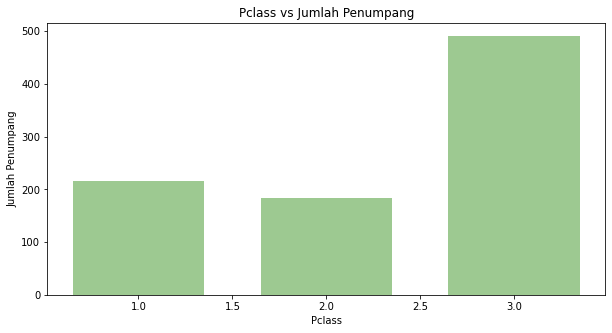

In [146]:
fig = plt.figure(figsize=(10,5))
plt.bar(index_pclass, value_pclass, color='#9dc991', width=0.7)

plt.xlabel('Pclass')
plt.ylabel('Jumlah Penumpang')
plt.title('Pclass vs Jumlah Penumpang')
plt.show()

In [147]:
def barchart(col):
    count = df[col].value_counts()
    index = count.index
    values = count.values
    
    fig = plt.figure(figsize=(10,5))
    plt.bar(index, values, color='#9dc991', width=0.7)

    plt.xlabel(col)
    plt.ylabel('Jumlah Penumpang')
    plt.title(col +' vs Jumlah Penumpang')
    plt.show()

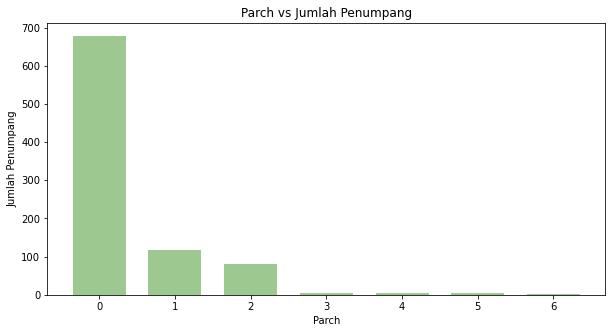

In [148]:
barchart('Parch')

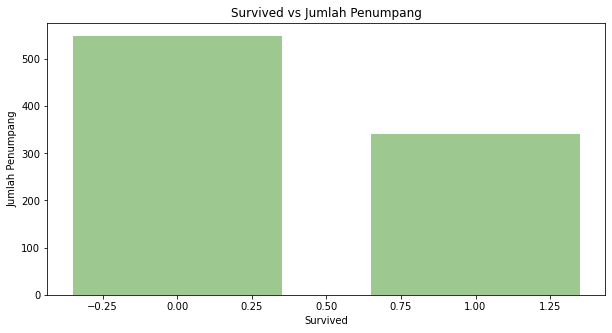

In [149]:
barchart('Survived')

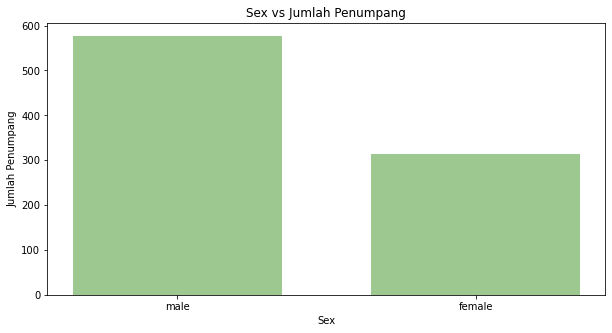

In [150]:
barchart('Sex')

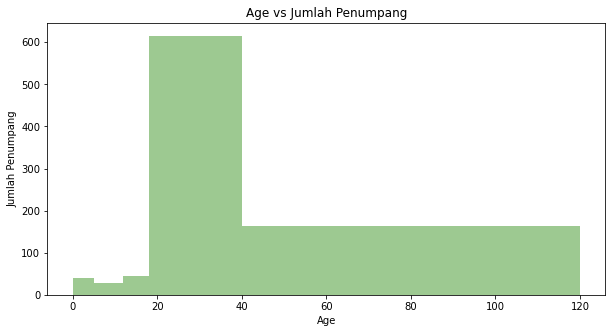

In [151]:
fig = plt.figure(figsize=(10,5))
plt.hist(df['Age'], color='#9dc991', bins=[0,5,12,18,40,120])

plt.xlabel('Age')
plt.ylabel('Jumlah Penumpang')
plt.title('Age vs Jumlah Penumpang')
plt.show()

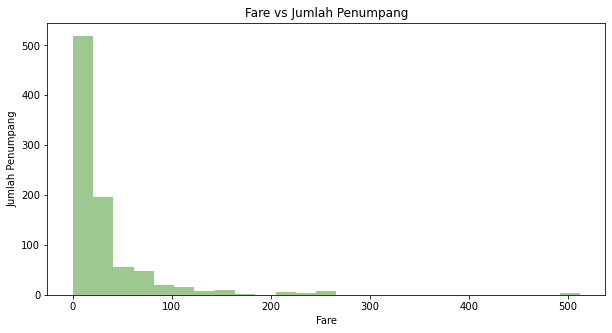

In [152]:
fig = plt.figure(figsize=(10,5))
plt.hist(df['Fare'], color='#9dc991', bins=25)

plt.xlabel('Fare')
plt.ylabel('Jumlah Penumpang')
plt.title('Fare vs Jumlah Penumpang')
plt.show()

## Target

In [153]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [154]:
df.Age[df.Survived == 1]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [155]:
df.Age[df.Survived == 0]

0      22.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    29.699118
890    32.000000
Name: Age, Length: 549, dtype: float64

### Numeric vs Target

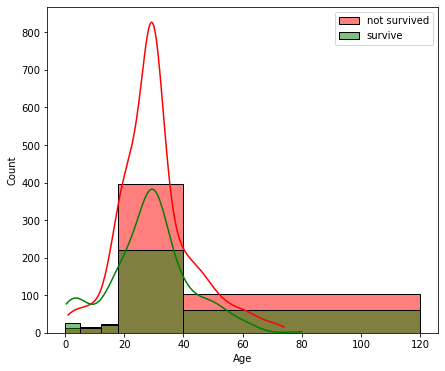

In [156]:
plt.figure(figsize=(7,6))
sns.histplot(df.Age[df.Survived == 0], bins=[0,5,12,18,40,120], color='r', label='not survived', kde=True)
sns.histplot(df.Age[df.Survived == 1], bins=[0,5,12,18,40,120], color='g', label='survive', kde=True)
plt.legend();

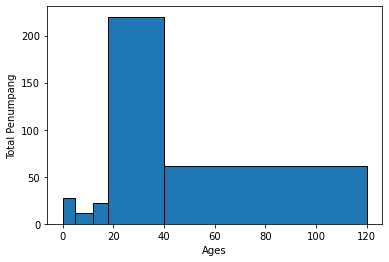

In [158]:
plt.hist(df.Age[df.Survived == 1], bins=[0,5,12,18,40,120], edgecolor='k')

plt.xlabel('Ages')
plt.ylabel('Total Penumpang')

plt.show()

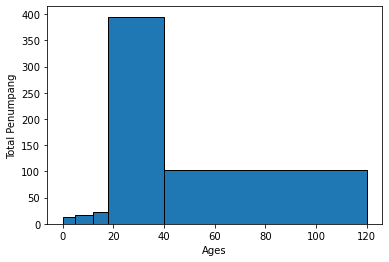

In [159]:
plt.hist(df.Age[df.Survived == 0], bins=[0,5,12,18,40,120], edgecolor='k')

plt.xlabel('Ages')
plt.ylabel('Total Penumpang')

plt.show()

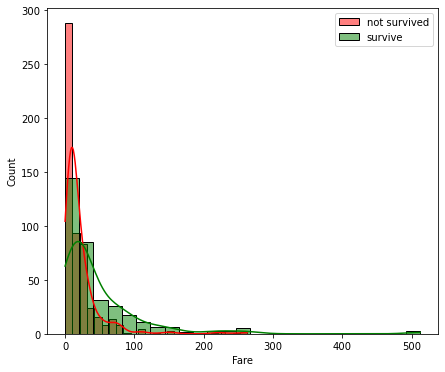

In [160]:
plt.figure(figsize=(7,6))
sns.histplot(df.Fare[df.Survived == 0], bins=25, color='r', label='not survived', kde=True)
sns.histplot(df.Fare[df.Survived == 1], bins=25, color='g', label='survive', kde=True)
plt.legend();

### Categorical vs Target

In [161]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


(('Pclass', <AxesSubplot:>), ('SibSp', <AxesSubplot:>), ('Parch', <AxesSubplot:>), ('Embarked', <AxesSubplot:>))


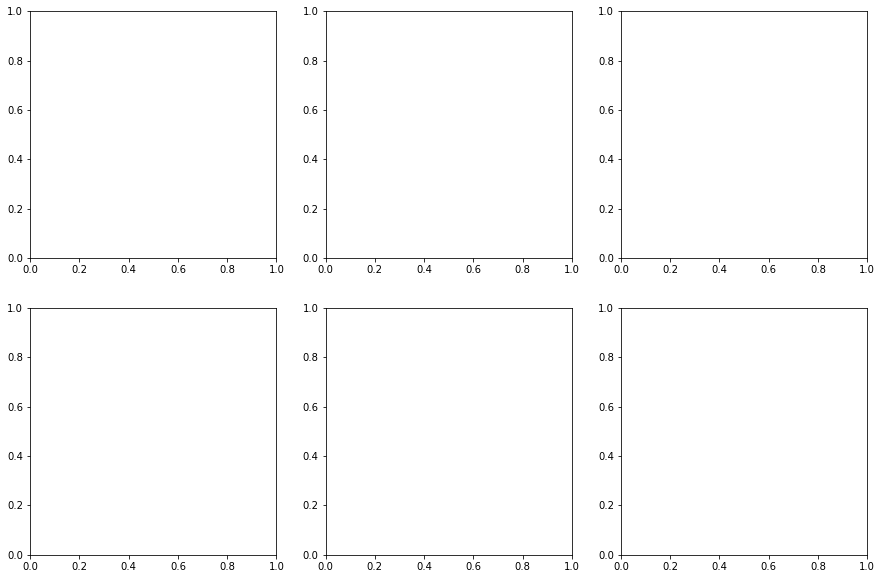

In [162]:
cat_var = ['Pclass', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(2,3 , figsize=(15,10))
a = zip(cat_var, axes.flatten())
print(tuple(a))

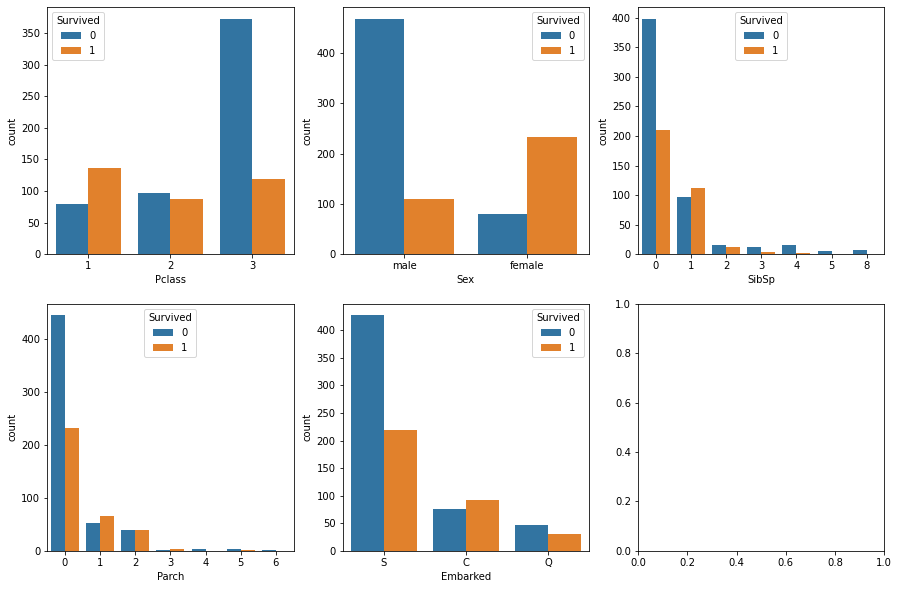

In [163]:
cat_var = ['Pclass', 'Sex','SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(2,3 , figsize=(15,10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue='Survived', ax=ax)
plt.show()

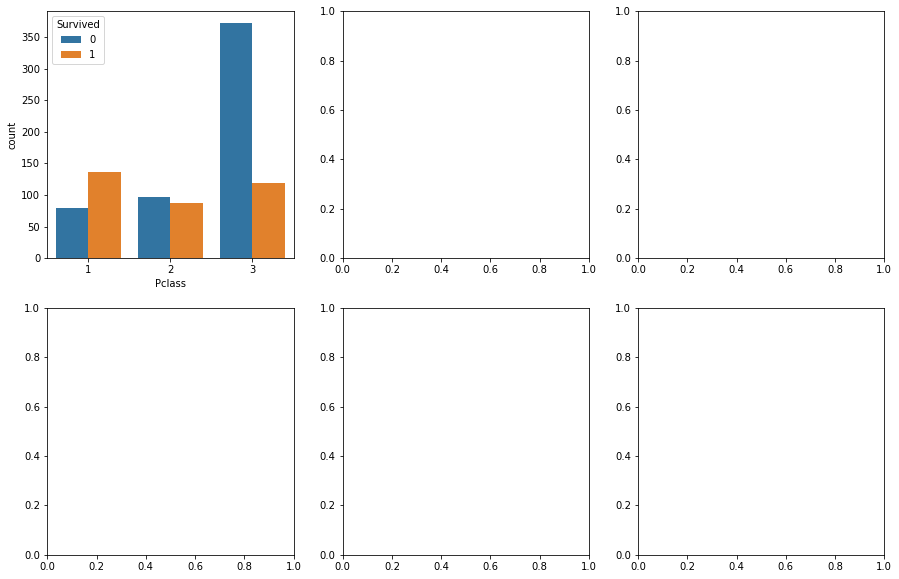

In [70]:
cat_var = ['Pclass', 'SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(2,3 , figsize=(15,10))
sns.countplot(x='Pclass', data=df, hue='Survived', ax=axes[0,0])
plt.show()